In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr

from functools import reduce

import matplotlib.pyplot as plt
%matplotlib inline

### Loading, combining the data

In [2]:
def load_data(data_type, name):
    data_path = '../data/'
    processed = 'processed'

    append = '_'+data_type+'_'+processed+'.csv'
    
    #where to load from
    df_load = os.path.join(data_path, processed, data_type, name+append)
    df = pd.read_csv(df_load, index_col=0)
    
    return df

In [3]:
#names of directories and file name keywords (by country)
prices = 'bean_prices'
climate = 'climate'
fertilizer = 'fertilizer'
demographics = 'demographics'
food_security = 'food_security'
land_use = 'land_use'
datasets = [prices, climate, fertilizer, demographics, food_security, land_use]

kenya_name = 'kenya'
rwanda_name = 'rwanda'
tanzania_name = 'tanzania'
uganda_name = 'uganda'

data_path = '../data/'
full = 'full'
append_out = '_'+full+'.csv'

#where to save to
kenya_save = os.path.join(data_path, full, kenya_name+append_out)
rwanda_save = os.path.join(data_path, full, rwanda_name+append_out)
tanzania_save = os.path.join(data_path, full, tanzania_name+append_out)
uganda_save = os.path.join(data_path, full, uganda_name+append_out)

In [4]:
def merge_datasets(datasets, country, city):
    prices, climate, fertilizer, demographics, food_security, land_use = datasets
    price = load_data(prices, country)
    clim = load_data(climate, country)
    fert = load_data(fertilizer, country)
    dem = load_data(demographics, country)
    food = load_data(food_security, country)
    land = load_data(land_use, country)
    
    dfs = [clim, price, fert, dem, food, land]
    #source: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
    df_merge = reduce(lambda left,right: pd.merge(left,right,on='Date-Monthly', how='left'), dfs)
    
    #i want to divide the precip data by 10 to convert from mm to cm
    df_merge['precip'] /= 10
    
    #we also need to standardize column names, so drop city name and add price
    df_merge['price'] = df_merge.loc[:, city]
    df_final = df_merge.drop(city, axis=1)
    
    return df_final

In [5]:
#notice that i am putting climate data first because it contains data for all months
#this means a left outer join will contain all months that we are interested in
kenya = merge_datasets(datasets, kenya_name, 'Nakuru')
tanzania = merge_datasets(datasets, tanzania_name, 'Dar es Salaam')
rwanda = merge_datasets(datasets, rwanda_name, 'Ruhengeri')
uganda = merge_datasets(datasets, uganda_name, 'Kampala')

In [6]:
kenya.columns

Index(['Date-Monthly', 'precip', 'mintemp', 'maxtemp', 'DAP', 'Urea',
       'Rural population', 'Total Population - Both sexes',
       'Total Population - Female', 'Total Population - Male',
       'Urban population',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Agricultural land (1000 ha)', 'Arable land (1000 ha)',
       'Country area (1000 ha)', 'Cropland (1000 ha)', 'Forest land (1000 ha)',
       'Land area (1000 ha)', 'Land under permanent crops (1000 ha)',
       'Other naturally regenerated forest (1000 ha)',
       'Planted Forest (1000 ha)', 'Primary Forest (1000 ha)', 'price'],
      dtype='object')

In [7]:
kenya.head(18)

,Date-Monthly,precip,mintemp,maxtemp,DAP,Urea,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,...,Arable land (1000 ha),Country area (1000 ha),Cropland (1000 ha),Forest land (1000 ha),Land area (1000 ha),Land under permanent crops (1000 ha),Other naturally regenerated forest (1000 ha),Planted Forest (1000 ha),Primary Forest (1000 ha),price
0,Jan-00,1.174234,8.671333,26.586790,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-00,0.848524,9.121604,27.611334,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-00,3.161969,11.373417,26.580687,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-00,8.154069,12.451365,26.112665,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-00,6.900716,12.405396,25.841312,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Jun-00,4.703608,10.546615,23.370468,NaN,NaN,25194.298,31964.557,16097.751,15866.806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Jul-00,4.029122,11.734094,23.978636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aug-00,8.234186,11.635531,24.012667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sep-00,4.855003,9.661698,24.320656,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Oct-00,6.013316,9.602667,24.951260,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
kenya.tail(18)

,Date-Monthly,precip,mintemp,maxtemp,DAP,Urea,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,...,Arable land (1000 ha),Country area (1000 ha),Cropland (1000 ha),Forest land (1000 ha),Land area (1000 ha),Land under permanent crops (1000 ha),Other naturally regenerated forest (1000 ha),Planted Forest (1000 ha),Primary Forest (1000 ha),price
210,Jul-17,16.052177,11.671594,23.241137,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600
211,Aug-17,10.486518,12.160531,23.882978,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600
212,Sep-17,6.981168,10.671073,24.480030,0.670209,0.524703,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600
213,Oct-17,15.532721,11.569855,25.755947,0.680130,0.529112,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600
214,Nov-17,9.149313,10.942240,24.474749,0.680130,0.534624,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590
215,Dec-17,4.160536,10.334719,25.026081,0.681232,0.535726,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640
216,Jan-18,6.090019,10.124458,25.702415,0.675720,0.534624,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660
217,Feb-18,5.968319,10.546604,27.761333,0.699971,0.553363,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490
218,Mar-18,6.596343,10.598417,25.576000,0.699971,0.548954,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495
219,Apr-18,14.940244,11.856051,24.704853,0.682334,0.532419,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500


We can see from the above printouts that we have full data for the climate variables of interest, and the interpolated price data contains most data, although it is missing for some years at the begining. The fertilizer data is sporadic, missing some months and years but being continuous at some intervals, and the demographic data contains annual averages. Both of these datasets will need to be interpolated before continuing.

Additionally, we will need to standardize our full datasets for each country for a particular timeframe. Thus, our analysis will be limited to years where we have data for each country, variable, year, and month. Let's look at the shape of our dataframes.

### Standardizing the dates in each dataset

In [9]:
print(kenya.shape)
print(tanzania.shape)
print(rwanda.shape)
print(uganda.shape)

(228, 24)
(228, 24)
(228, 24)
(228, 24)


It would seem that our dataframes all have the same shape. But this is because the climate data is full, and we used that to join the data. The price data is the variable we want to be able to investigate, looking for its imortance features, so the times we have price data available will be the limiting factors. Let's find the starting and ending date for price for each city/country.

In [10]:
def start_end_dates(df):
    #index values for price data
    idx_values = df.loc[:, ['Date-Monthly', 'price']].dropna(axis=0).index
    
    #first and last index
    start, end = idx_values[0], idx_values[-1]
    
    #first and last date
    start_date, end_date = df.iloc[start]['Date-Monthly'], df.iloc[end]['Date-Monthly']
    return start_date, end_date

In [11]:
#extract start and end dates
kenya_start, kenya_end = start_end_dates(kenya)
rwanda_start, rwanda_end = start_end_dates(rwanda)
tanzania_start, tanzania_end = start_end_dates(tanzania)
uganda_start, uganda_end = start_end_dates(uganda)

#make lists for dataframe columns
countries = ['kenya', 'rwanda', 'tanzania', 'uganda']
start_dates = [kenya_start, rwanda_start, tanzania_start, uganda_start]
end_dates = [kenya_end, rwanda_end, tanzania_end, uganda_end]

#make and display dataframe
limiting_dates = pd.DataFrame({'country':countries,
                              'start':start_dates,
                              'end':end_dates})

limiting_dates.head()

,country,start,end
0,kenya,Jan-08,Dec-18
1,rwanda,Mar-10,Dec-18
2,tanzania,Jan-06,Dec-18
3,uganda,Jan-08,Dec-18


It is unfortunate that we have to throw away data, but it looks like we will have to run the analysis from January 2010 - December 2018. All countries have data in that range execpt for Rwanda, but I feel okay about interpolating back two months to save an extra year of data. This may seem like an extreme step, getting rid of 2-4 years of data, but the point of this analysis is to look at a standardized set of variables over a standardized time period to see which factors influence price the most. This will only work if we limit each dataframe to the same years and months.

One thing we still need to do is interpolate our data. Let's do that now, so that when we subset for the dates that we want we have all filled columns.

In [12]:
#limit_direction='both' will interpolate/backfill data in case the first value is a NaN
kenya_interp = kenya.interpolate(limit_direction='both')
rwanda_interp = rwanda.interpolate(limit_direction='both')
tanzania_interp = tanzania.interpolate(limit_direction='both')
uganda_interp = uganda.interpolate(limit_direction='both')

In [13]:
#now subset data
kenya_subset = kenya_interp.set_index('Date-Monthly').loc['Jan-10':'Dec-18', :].reset_index()
rwanda_subset = rwanda_interp.set_index('Date-Monthly').loc['Jan-10':'Dec-18', :].reset_index()
tanzania_subset = tanzania_interp.set_index('Date-Monthly').loc['Jan-10':'Dec-18', :].reset_index()
uganda_subset = uganda_interp.set_index('Date-Monthly').loc['Jan-10':'Dec-18', :].reset_index()

In [14]:
kenya_subset.head(20)

,Date-Monthly,precip,mintemp,maxtemp,DAP,Urea,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,...,Arable land (1000 ha),Country area (1000 ha),Cropland (1000 ha),Forest land (1000 ha),Land area (1000 ha),Land under permanent crops (1000 ha),Other naturally regenerated forest (1000 ha),Planted Forest (1000 ha),Primary Forest (1000 ha),price
0,Jan-10,4.460338,10.782270,27.047728,0.719813,0.583126,31314.145917,41560.307667,20926.222417,20634.092417,...,5500.000000,58037.0,6020.000000,4230.00,56914.0,520.000000,4037.0,193.00,0.0,0.68
1,Feb-10,7.107909,10.659104,26.831646,0.719813,0.583126,31372.013333,41654.381333,20973.346333,20681.042333,...,5500.000000,58037.0,6020.000000,4230.00,56914.0,520.000000,4037.0,193.00,0.0,0.64
2,Mar-10,11.365961,11.953104,27.468187,0.719813,0.583126,31429.880750,41748.455000,21020.470250,20727.992250,...,5500.000000,58037.0,6020.000000,4230.00,56914.0,520.000000,4037.0,193.00,0.0,0.63
3,Apr-10,12.749496,13.551364,25.737667,0.737450,0.590842,31487.748167,41842.528667,21067.594167,20774.942167,...,5500.000000,58037.0,6020.000000,4230.00,56914.0,520.000000,4037.0,193.00,0.0,0.64
4,May-10,10.510549,12.708521,25.077250,0.726427,0.571000,31545.615583,41936.602333,21114.718083,20821.892083,...,5500.000000,58037.0,6020.000000,4230.00,56914.0,520.000000,4037.0,193.00,0.0,0.65
5,Jun-10,5.170495,11.459115,23.615780,0.691153,0.551159,31603.483000,42030.676000,21161.842000,20868.842000,...,5500.000000,58037.0,6020.000000,4230.00,56914.0,520.000000,4037.0,193.00,0.0,0.59
6,Jul-10,6.559915,10.724718,23.219261,0.741859,0.573205,31661.795917,42126.309167,21209.785000,20916.531167,...,5525.000000,58037.0,6045.833333,4233.05,56914.0,520.833333,4039.6,193.45,0.0,0.51
7,Aug-10,5.259674,11.443343,23.920479,0.720915,0.582023,31720.108833,42221.942333,21257.728000,20964.220333,...,5550.000000,58037.0,6071.666667,4236.10,56914.0,521.666667,4042.2,193.90,0.0,0.48
8,Sep-10,5.224927,10.474198,24.425343,0.735245,0.567693,31778.421750,42317.575500,21305.671000,21011.909500,...,5575.000000,58037.0,6097.500000,4239.15,56914.0,522.500000,4044.8,194.35,0.0,0.46
9,Oct-10,6.407996,10.802667,25.905949,0.771622,0.510373,31836.734667,42413.208667,21353.614000,21059.598667,...,5600.000000,58037.0,6123.333333,4242.20,56914.0,523.333333,4047.4,194.80,0.0,0.44


In [15]:
rwanda_subset.head(20)

,Date-Monthly,precip,mintemp,maxtemp,DAP,Urea,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,...,Arable land (1000 ha),Country area (1000 ha),Cropland (1000 ha),Forest land (1000 ha),Land area (1000 ha),Land under permanent crops (1000 ha),Other naturally regenerated forest (1000 ha),Planted Forest (1000 ha),Primary Forest (1000 ha),price
0,Jan-10,13.941298,13.327754,24.736055,0.565489,0.488326,8418.583167,9932.434667,5064.679833,4867.754833,...,1123.920000,2634.0,1373.920000,446.000000,2467.0,250.0,55.0,384.000000,7.0,0.420
1,Feb-10,31.847662,13.014627,24.108702,0.565489,0.488326,8437.195333,9953.815333,5075.435667,4878.379667,...,1123.920000,2634.0,1373.920000,446.000000,2467.0,250.0,55.0,384.000000,7.0,0.420
2,Mar-10,15.493356,14.120647,24.633526,0.565489,0.488326,8455.807500,9975.196000,5086.191500,4889.004500,...,1123.920000,2634.0,1373.920000,446.000000,2467.0,250.0,55.0,384.000000,7.0,0.420
3,Apr-10,18.309883,13.764366,24.545443,0.565489,0.488326,8474.419667,9996.576667,5096.947333,4899.629333,...,1123.920000,2634.0,1373.920000,446.000000,2467.0,250.0,55.0,384.000000,7.0,0.370
4,May-10,15.413672,13.781482,23.507832,0.565489,0.488326,8493.031833,10017.957333,5107.703167,4910.254167,...,1123.920000,2634.0,1373.920000,446.000000,2467.0,250.0,55.0,384.000000,7.0,0.440
5,Jun-10,5.514947,12.877957,24.445251,0.565489,0.488326,8511.644000,10039.338000,5118.459000,4920.879000,...,1123.920000,2634.0,1373.920000,446.000000,2467.0,250.0,55.0,384.000000,7.0,0.460
6,Jul-10,2.802573,12.439471,25.435170,0.565489,0.488326,8530.242667,10060.504083,5129.093667,4931.410583,...,1125.380000,2634.0,1375.380000,446.566667,2467.0,250.0,55.0,384.566667,7.0,0.420
7,Aug-10,5.449293,12.803041,25.996698,0.727529,0.552261,8548.841333,10081.670167,5139.728333,4941.942167,...,1126.840000,2634.0,1376.840000,447.133333,2467.0,250.0,55.0,385.133333,7.0,0.420
8,Sep-10,12.762316,13.049846,25.569067,0.847682,0.626116,8567.440000,10102.836250,5150.363000,4952.473750,...,1128.300000,2634.0,1378.300000,447.700000,2467.0,250.0,55.0,385.700000,7.0,0.460
9,Oct-10,14.442522,13.384651,25.218510,0.862012,0.645958,8586.038667,10124.002333,5160.997667,4963.005333,...,1129.760000,2634.0,1379.760000,448.266667,2467.0,250.0,55.0,386.266667,7.0,0.590


### Removing annual monthly means

Before we go further, we need to make sure that the time series we are analyzing aren't overly influenced by a annual or monthly cycle. That is, we want to subtract the average of each month (January, February, March, etc.) from each month of the same kind in our dataset. For example: we are going to average over all of the Januaries in our dataset, then subtract that January mean from each January in the dataset. This way we can decouple time series from the annual cycle and start analyzing the underlying "true" signal.

I have found that the package [Xarray](https://xarray.pydata.org/en/stable/examples/monthly-means.html) makes this task extremely easy. But before we use it, we need to change the `Date-Monthly` column into something that is easier to perform group-by and sort operations on.

In [16]:
# extract just the monthly abbreviations from the Date-Montly column
# example: Jan-10 -> Jan
rwanda_subset['month'] = [x[:3] for x in rwanda_subset['Date-Monthly'].values]

In [17]:
# from there we can replace the column names with their respective numbers
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
replace_with = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
rwanda_subset.month.replace(to_replace=months, value=replace_with, inplace=True)

In [18]:
rwanda_subset.month

0       1
1       2
2       3
3       4
4       5
       ..
103     8
104     9
105    10
106    11
107    12
Name: month, Length: 108, dtype: int64

In [19]:
# it is easy to change between pandas dataframes and xarray datasets
xr_rwanda = rwanda_subset.to_xarray()

In [20]:
type(xr_rwanda)

xarray.core.dataset.Dataset

In [21]:
# this is the annual cycle
xr_means = xr_rwanda.groupby('month').mean()

In [22]:
xr_means

<xarray.Dataset>
Dimensions:                                                            (month: 12)
Coordinates:
  * month                                                              (month) int64 ...
Data variables:
    precip                                                             (month) float64 ...
    mintemp                                                            (month) float64 ...
    maxtemp                                                            (month) float64 ...
    DAP                                                                (month) float64 ...
    Urea                                                               (month) float64 ...
    Rural population                                                   (month) float64 ...
    Total Population - Both sexes                                      (month) float64 ...
    Total Population - Female                                          (month) float64 ...
    Total Population - Male                                            (month) float64 ...
    Urban population                                                   (month) float64 ...
    Average dietary energy supply adequacy (percent) (3-year average)  (month) float64 ...
    Political stability and absence of violence/terrorism (index)      (month) float64 ...
    Agricultural land (1000 ha)                                        (month) float64 ...
    Arable land (1000 ha)                                              (month) float64 ...
    Country area (1000 ha)                                             (month) float64 ...
    Cropland (1000 ha)                                                 (month) float64 ...
    Forest land (1000 ha)                                              (month) float64 ...
    Land area (1000 ha)                                                (month) float64 ...
    Land under permanent crops (1000 ha)                               (month) float64 ...
    Other naturally regenerated forest (1000 ha)                       (month) float64 ...
    Planted Forest (1000 ha)                                           (month) float64 ...
    Primary Forest (1000 ha)                                           (month) float64 ...
    price                                                              (month) float64 ...

In [23]:
# now we can subtract the monthly means to get a clearer picture
# of each column's underlying signal
xr_rwanda = xr_rwanda.groupby('month') - xr_means
rwanda_std = xr_rwanda.to_dataframe()
df_means = xr_means.to_dataframe()

In [24]:
rwanda_std.columns

Index(['month', 'precip', 'mintemp', 'maxtemp', 'DAP', 'Urea',
       'Rural population', 'Total Population - Both sexes',
       'Total Population - Female', 'Total Population - Male',
       'Urban population',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Agricultural land (1000 ha)', 'Arable land (1000 ha)',
       'Country area (1000 ha)', 'Cropland (1000 ha)', 'Forest land (1000 ha)',
       'Land area (1000 ha)', 'Land under permanent crops (1000 ha)',
       'Other naturally regenerated forest (1000 ha)',
       'Planted Forest (1000 ha)', 'Primary Forest (1000 ha)', 'price'],
      dtype='object')

It looks like the anomaly dataframe lost the `Date-Monthly` column when we performed the group-by operation. Let's add that back in.

In [25]:
rwanda_std['Date-Monthly'] = rwanda_subset['Date-Monthly']

This next bit is just for plotting. I am concatenating the annual cycle together until it spans the entire length of our original dataset, that way I can overlay it on the original data. I'm interested in seeing how much a given column is influenced by its annual cycle.

In [26]:
anomaly_list = []
for i in range(9):
    anomaly_list.append(df_means.precip)
    
precip_cycle = pd.concat(anomaly_list).reset_index()
precip_cycle.month = list(range(0, 108))
precip_cycle

,month,precip
0,0,8.999704
1,1,14.063355
2,2,14.299147
3,3,18.081116
4,4,13.786328
...,...,...
103,103,6.186495
104,104,14.762934
105,105,14.558600
106,106,16.213104


/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


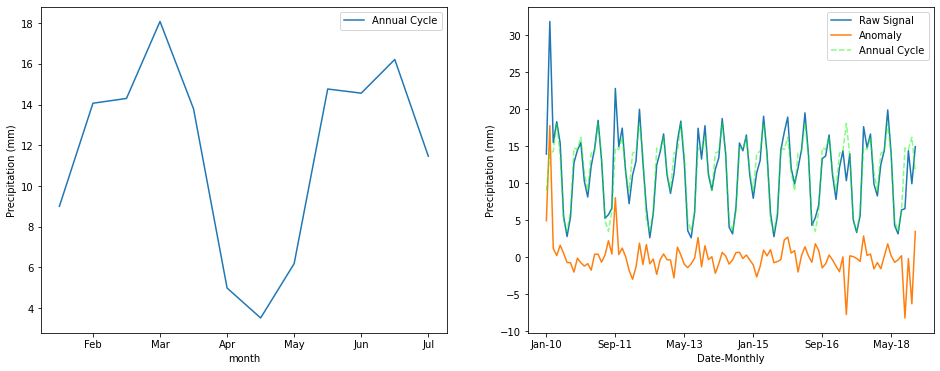

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

df_means[['precip']].rename(columns={'precip': 'Annual Cycle'}).plot(label='Anomaly', ax=ax[0])
rwanda_subset[['Date-Monthly', 'precip']].rename(columns={'precip': 'Raw Signal'}).plot(x='Date-Monthly', ax=ax[1])
rwanda_std[['Date-Monthly', 'precip']].rename(columns={'precip': 'Anomaly'}).plot(x='Date-Monthly', ax=ax[1])
precip_cycle[['precip']].rename(columns={'precip': 'Annual Cycle'}).plot(color='lime', linestyle='--', alpha=0.5, ax=ax[1])

ax[0].set_xticklabels(months)
ax[0].set_ylabel('Precipitation (mm)')
ax[1].set_ylabel('Precipitation (mm)')
ax[0].legend()
ax[1].legend()

plt.show()

In [ ]:
# now do the same plot below, but this time not for a climate variable

### De-inflating price data

### Plotting

In [16]:
def plot_final_df(df, country, city): 
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    #climate
    df[['Date-Monthly', 'precip']].plot(x='Date-Monthly', ax=ax[0, 0])
    df[['Date-Monthly', 'mintemp']].plot(x='Date-Monthly', ax=ax[0, 0])
    df[['Date-Monthly', 'maxtemp']].plot(x='Date-Monthly', ax=ax[0, 0])
    
    
    #population
    df[['Date-Monthly', 'Rural population']].plot(x='Date-Monthly', ax=ax[0, 1])
    df[['Date-Monthly', 'Urban population']].plot(x='Date-Monthly', ax=ax[0, 1])
    df[['Date-Monthly', 'Total Population - Both sexes']].plot(x='Date-Monthly', ax=ax[0, 1])
    df[['Date-Monthly', 'Total Population - Female']].plot(x='Date-Monthly', ax=ax[0, 1])
    df[['Date-Monthly', 'Total Population - Male']].plot(x='Date-Monthly', ax=ax[0, 1])
    ax[0, 1].set_ylabel('Population / 1000 people')
    
    #prices
    df[['Date-Monthly', 'price']].plot(x='Date-Monthly', ax=ax[1, 0])
    df[['Date-Monthly', 'DAP']].plot(x='Date-Monthly', ax=ax[1, 0])
    df[['Date-Monthly', 'Urea']].plot(x='Date-Monthly', ax=ax[1, 0])
    ax[1, 0].set_ylabel('Price data (USD/kg)')
        
    #food security
    df[['Date-Monthly', 'Average dietary energy supply adequacy (percent) (3-year average)']].plot(x='Date-Monthly', ax=ax[1, 1])
    ax[1, 1].set_ylabel('%')
    
    df[['Date-Monthly', 'Political stability and absence of violence/terrorism (index)']].plot(x='Date-Monthly', ax=twin_xaxis, color='orange')
    

    ax[0, 0].legend(['Precip (cm)', 'Min temp (C)', 'Max temp (C)'])
    ax[0, 1].legend(['Rural', 'Urban', 'Total', 'Female', 'Male'])
    ax[1, 0].legend([city+', beans', country+', DAP', country+', Urea'])
    ax[1, 1].legend(['Average dietary energy supply adequacy'], loc='upper left')
    twin_xaxis.legend(['Political stability index'], loc='lower left')
    plt.show()

/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


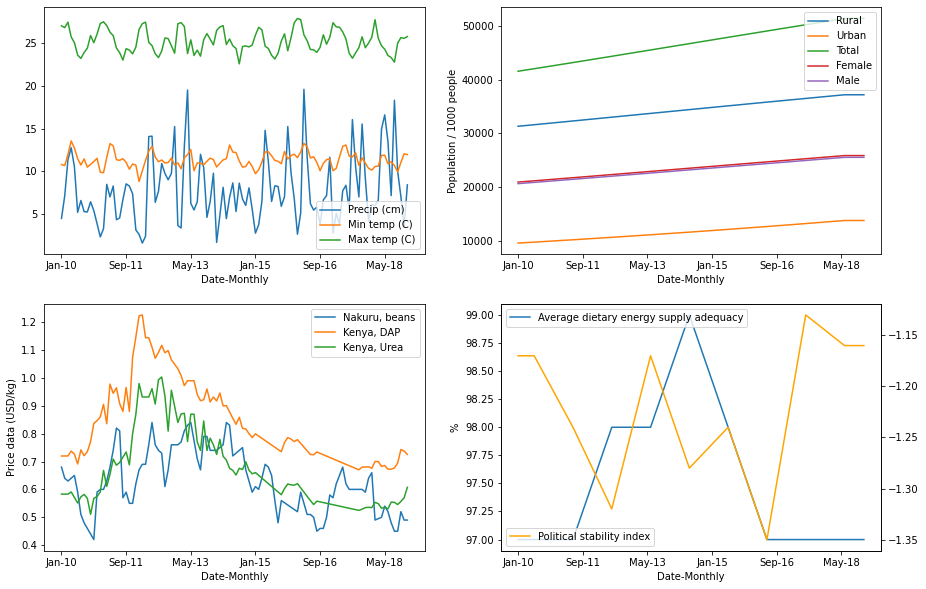

In [17]:
plot_final_df(kenya_subset, 'Kenya', 'Nakuru')

/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


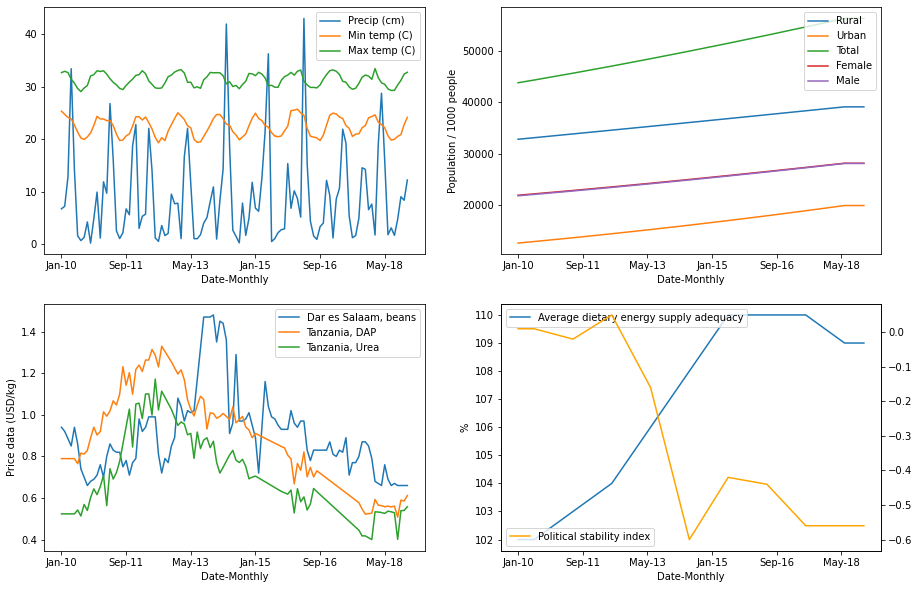

In [18]:
plot_final_df(tanzania_subset, 'Tanzania', 'Dar es Salaam')

/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


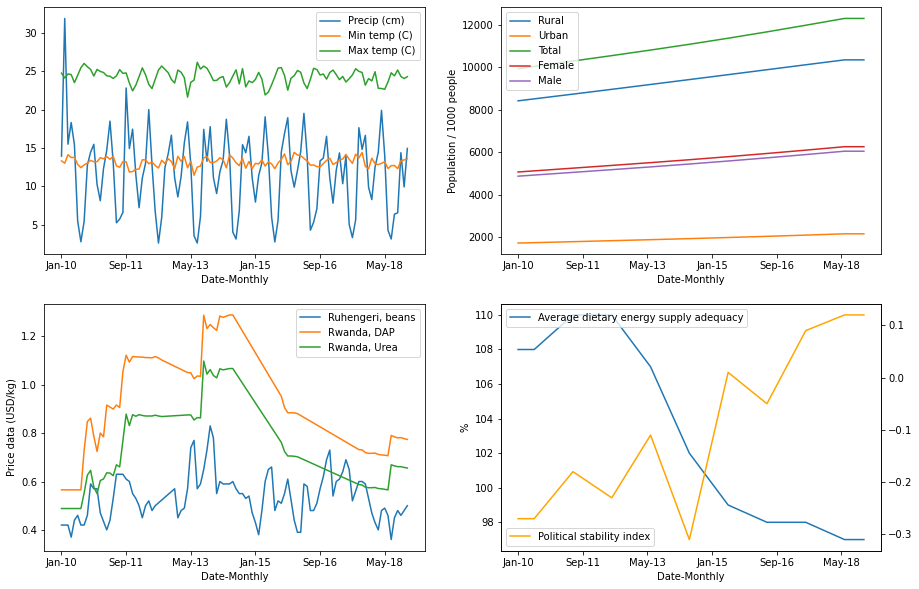

In [19]:
plot_final_df(rwanda_subset, 'Rwanda', 'Ruhengeri')

/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jakidxav/anaconda3/envs/ciat/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


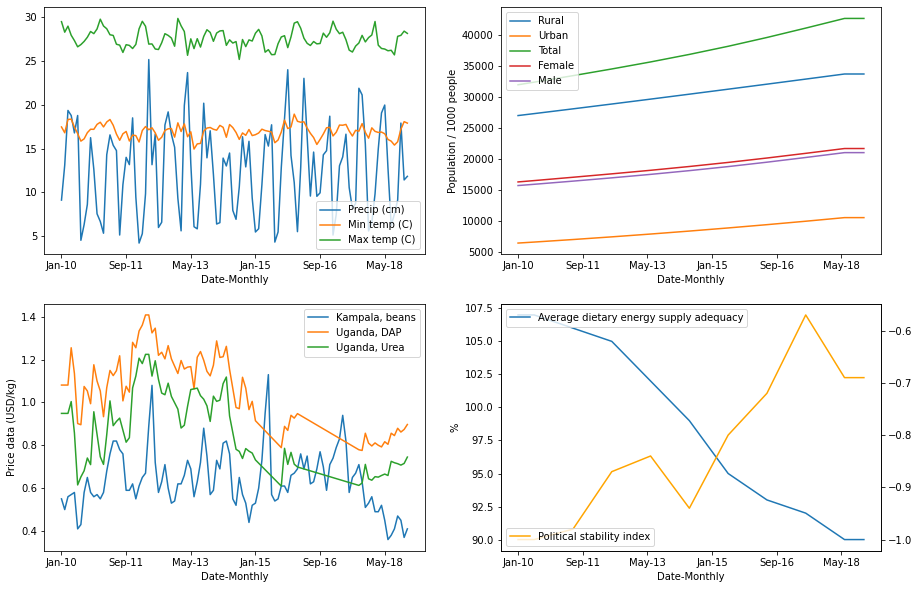

In [20]:
plot_final_df(uganda_subset, 'Uganda', 'Kampala')

In [21]:
#save data here
#kenya_subset.to_csv(kenya_save)
#rwanda_subset.to_csv(rwanda_save)
#tanzania_subset.to_csv(tanzania_save)
#uganda_subset.to_csv(uganda_save)